In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns

In [695]:
# read the dataset
my_data = pd.read_csv('E:\\Desktop\\iris.csv')
my_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [696]:
# feature selection
data = my_data.loc[:, ['sepal.length','petal.length']]
data.head()

,sepal.length,petal.length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [697]:
# convert the selected feature from pandas to numpy array
data_np = data.values
data_np

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

C:\Users\Ahmed Gamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


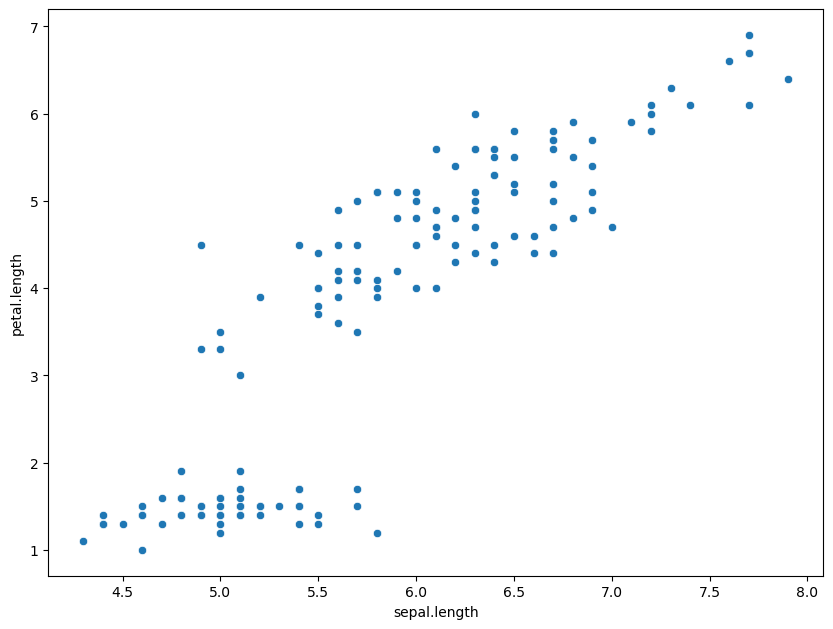

In [698]:
# diplay the plot
sns.scatterplot(data_np[:,0], data_np[:,1])
plt.xlabel('sepal.length')
plt.ylabel('petal.length')
plt.show()

In [699]:
# WCSS (Within cluster sum of square) function
def WCSS(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [700]:
# kmeans function
def Kmeans(X, K):
    # a value to which we will stop the iteration when the difference 
    # between the old centroids and the new centroids 
    diff = True 
    # make a cluster vector or column of zeroes with 
    # the same size (no. of columns) as the input column 
    cluster = np.zeros(X.shape[0])
    # intialize centroids from the pandas selected features
    # such that each centroid consists of a random observation then
    # convert it to numpy array
    centroids = data.sample(n=K).values
    #print(f"centroids = {centroids}")
    # will iterate over each observation
    while diff:
        #iterate over each data point
        for i, row in enumerate(X):
            # inialize the minimum distance as very large value
            mn_dist = float('inf')
            # distance of this observation row from all centroids
            # iterate over each centroid and measure the distance
            for j, centroid in enumerate(centroids):
                dist = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                if (dist <= mn_dist):
                    # if the distance between this centroid is smaller than 
                    # some value update the minimum distance and add 
                    # the centroid index to cluster i 
                    mn_dist = dist
                    cluster[i] = j
                # make a new centroids by grouping by the cluster which 
                # has the index of the nearest centroid to that point
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        if len(new_centroids) < len(centroids):
                new_centroids = centroids
        #print(f"new_centroids = {new_centroids}")
        #Counts the number of non-zero values in the array 
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = False
            # then it will break the loop 
        else:
            # update the centroids 
            centroids = new_centroids 
    return centroids, cluster

In [701]:
# use K-means function
centroids_, cluster = Kmeans(data_np, 5)

In [702]:
print(centroids_)
print(cluster)

[[7.475      6.3       ]
 [6.13235294 4.73529412]
 [5.006      1.462     ]
 [5.52307692 3.91923077]
 [6.58571429 5.43214286]]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 1. 4. 3. 1. 1. 1. 3. 1. 3. 3. 3. 3. 1. 3. 1. 1. 3. 1. 3. 1. 3.
 1. 1. 1. 1. 4. 4. 1. 3. 3. 3. 3. 1. 3. 1. 1. 1. 3. 3. 3. 1. 3. 3. 3. 3.
 3. 1. 3. 3. 4. 1. 0. 4. 4. 0. 3. 0. 4. 0. 4. 4. 4. 1. 1. 4. 4. 0. 0. 1.
 4. 1. 0. 1. 4. 0. 1. 1. 4. 0. 0. 0. 4. 1. 4. 0. 4. 4. 1. 4. 4. 4. 1. 4.
 4. 4. 1. 4. 4. 1.]


C:\Users\Ahmed Gamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ahmed Gamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


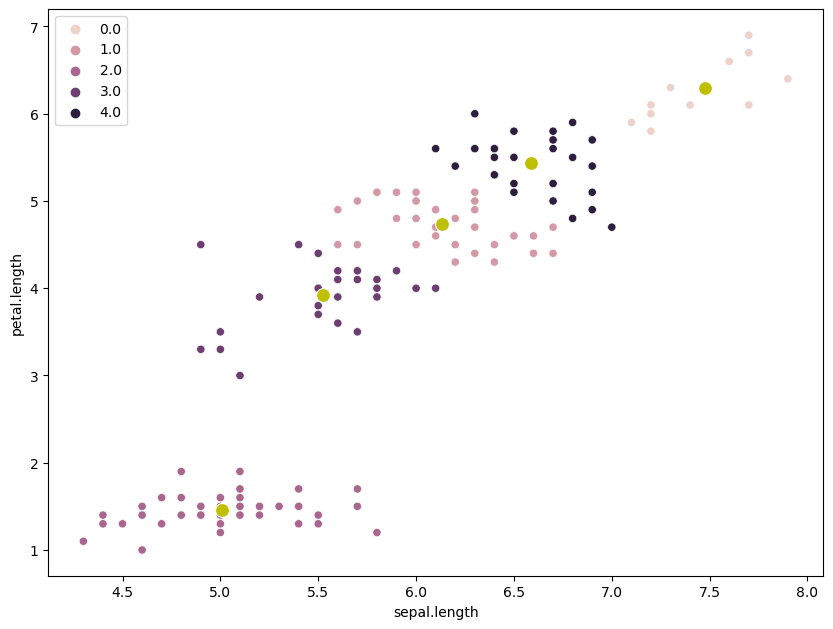

In [703]:
# visualize the clusters 
sns.scatterplot(data_np[:,0], data_np[:,1], hue=cluster)
sns.scatterplot(centroids_[:,0], centroids_[:,1], s=100 , color='y')
plt.xlabel('sepal.length')
plt.ylabel('petal.length')
plt.show()

In [704]:
from sklearn.metrics import silhouette_score
silhouette_score(data_np, cluster)

0.5530891331812755

In [708]:
cost_list = []
min_cost_list = []
for k in range(2, 10):
    for i in range(20):
        centroids, cluster = kmeans(data_np, k)
        # WCSS (Within cluster sum of square)
        cost = WCSS(data_np, centroids, cluster)
        cost_list.append(cost)
    min_cost_list.append(np.min(cost_list))

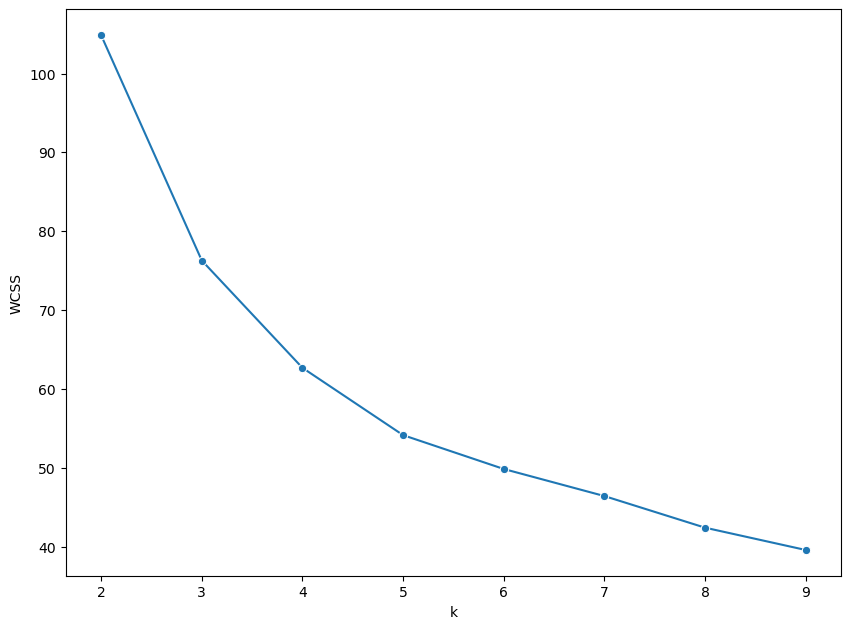

In [709]:
sns.lineplot(x=range(2,10), y=min_cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

C:\Users\Ahmed Gamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


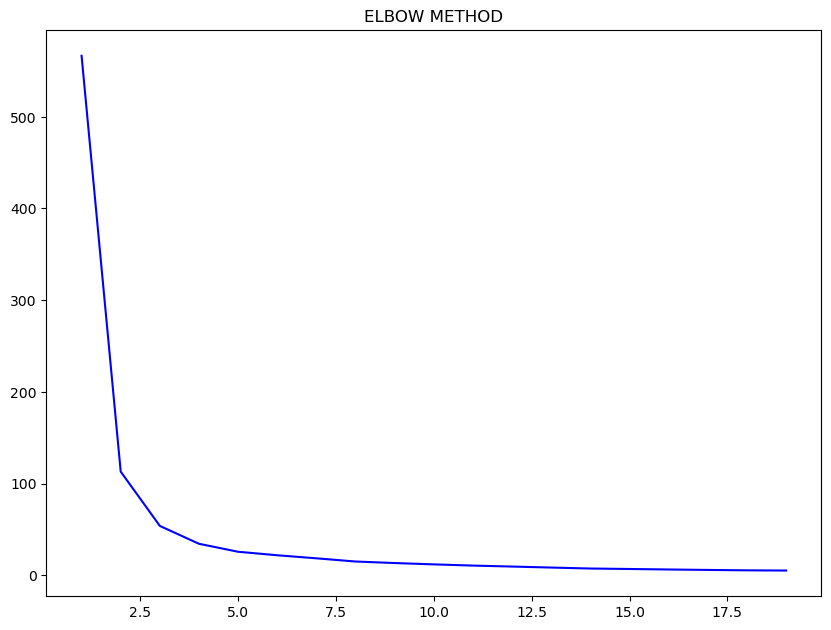

In [710]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(data_np)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

In [711]:
# use K-means function
centroids_, cluster = Kmeans(data_np, 3)

In [712]:
print(centroids_)
print(cluster)

[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]


C:\Users\Ahmed Gamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ahmed Gamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


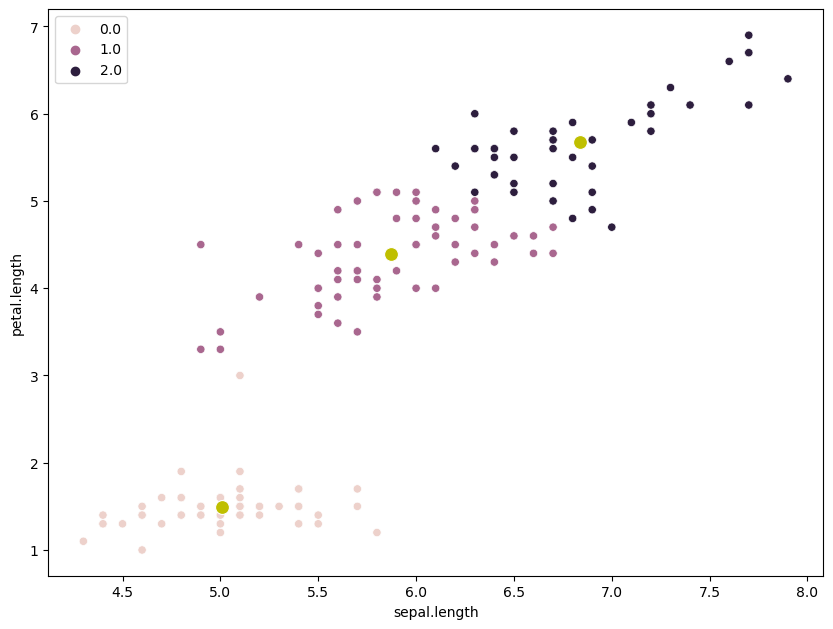

In [713]:
# visualize the clusters 
sns.scatterplot(data_np[:,0], data_np[:,1], hue=cluster)
sns.scatterplot(centroids_[:,0], centroids_[:,1], s=100 , color='y')
plt.xlabel('sepal.length')
plt.ylabel('petal.length')
plt.show()

In [714]:
from sklearn.metrics import silhouette_score
silhouette_score(data_np, cluster)

0.5890584158017611